# Project 3: Sustainability Regression 

-----------------------------
In this notebook, we will guide you to fill in the Project 3 for OPIM 5641: Business Decision Modeling. While you do not need to absolutely follow these instructions (there is more than one way to solve the data wrangling/cleaning), it is HIGHLY recommended if you are still new(er) to Python. 

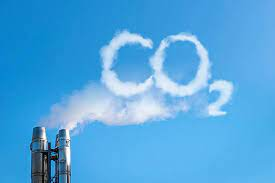



#List of countries assigned for our group 
'CAN','CHN','COL','ESP','FIN','FRA' 

# Import libs

 installing a solver to solve a mixed-integer nonlinear program (!) 

In [ ]:
# importing modules
import pandas as pd
import numpy as np
from pylab import * 
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("bonmin") or os.path.isfile("bonmin")):
    if "google.colab" in sys.modules:
        !wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
        !unzip -o -q bonmin-linux64
        # !apt-get install -y -qq mindtpy
    else:
        try:
            !conda install -c conda-forge ipopt
        except:
            pass

assert(shutil.which("bonmin") or os.path.isfile("bonmin"))

from pyomo.environ import *


#Pre-Processing of the data#



# Reading the data 
Downloaded the raw data `Data` and reading it as `df_data` and data dictionary `Series` as `df_series` from the Excel worksheet using `pd.read_excel()`.



Downloading the shareable dataset using `!gdown --id SHAREABLE_LINK` 

In [ ]:
# https://docs.google.com/spreadsheets/d/1cB3ep8hBXrUcBp-DHoplEpJABaZsaCQ3/edit?usp=sharing&ouid=105133078201960946471&rtpof=true&sd=true
!gdown --id 1cB3ep8hBXrUcBp-DHoplEpJABaZsaCQ3
df_data = pd.read_excel('climate_change_download_0.xls',sheet_name='Data')#downloading raw data
df_series = pd.read_excel('climate_change_download_0.xls',sheet_name='Series')#downloading data dictionary

Downloading...
From: https://drive.google.com/uc?id=1cB3ep8hBXrUcBp-DHoplEpJABaZsaCQ3
To: /content/climate_change_download_0.xls
100% 4.86M/4.86M [00:00<00:00, 75.1MB/s]


Here is the raw data, called `df_data`.

In [ ]:
df_data.head() #viewing first five observations of the data 

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.5748,..,..,..,..,..,..,..,..,..,29.5748,..,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,..,..,..,..,..,..,0,..,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,..,..,..,..,..,..,0,..,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,..,..,..,..,..,..,0.208235,..,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.96788,..,..,..,..,..,..,..,..,..,4.96788,..,..,..,..,..,..,..,..,..,..,..


In [ ]:
df_data.shape            # Defining data shape 

(13512, 28)

Here is the data dictionary, called `df_series`.

In [ ]:
df_series.head()     # return first five rows of the dataset

,Series code,Series name,Scale,Decimals,Order,Topic,Definition,Source
0,SP.POP.TOTL,Population,0,0,1,Size of the economy,Population includes all residents who are pres...,(1) United Nations Population Division. 2011. ...
1,SP.POP.GROW,Population growth (annual %),0,1,2,Size of the economy,Annual population growth rate for year t is th...,Derived from total population. Population sour...
2,NY.GDP.MKTP.CD,GDP ($),0,0,3,Size of the economy,GDP is gross domestic product and measures the...,"World Bank national accounts data, and OECD Na..."
3,NY.GNP.PCAP.CD,GNI per capita (Atlas $),0,0,4,Size of the economy,"GNI per capita is the gross national income, c...","World Bank national accounts data, and OECD Na..."
4,EN.CLC.MMDT.C,"Average daily min/max temperature (1961-1990, ...",Text,Text,5,Climate,Average daily min/max temperature are the mini...,"Mitchell, T.D., Carter, T.R., Jones, P.D., Hul..."


In [ ]:
df_series.shape #returning the number of elements in the data

(58, 8)

# Merge dataframes
To make things easier, we are joining these datasets into one master dataframe. We will augment the data with the series defintions by doing a merge where `df_data` is left and `df_series` is right - we are using 'Series code' for both the `left_on` and `right_on` arguments). 

We named our new complete dataframe as `df`.




######Merge with a left on and right on 

In [ ]:
# Merging the df_data with df_series on common columns series name to generate new dataframe df

df = pd.merge(df_data,df_series, on = "Series name" )
df

,Country code,Country name,Series code_x,Series name,SCALE,Decimals_x,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Series code_y,Scale,Decimals_y,Order,Topic,Definition,Source
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.5748,..,..,..,..,..,..,..,..,..,29.5748,..,..,..,..,..,..,..,..,..,..,..,AG.LND.EL5M.ZS,0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,..,..,..,..,..,..,0,..,..,..,..,..,..,..,..,..,..,..,AG.LND.EL5M.ZS,0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,..,..,..,..,..,..,0,..,..,..,..,..,..,..,..,..,..,..,AG.LND.EL5M.ZS,0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,..,..,..,..,..,..,0.208235,..,..,..,..,..,..,..,..,..,..,..,AG.LND.EL5M.ZS,0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.96788,..,..,..,..,..,..,..,..,..,4.96788,..,..,..,..,..,..,..,..,..,..,..,AG.LND.EL5M.ZS,0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13507,YEM,"Yemen, Rep.",SP.URB.TOTL,Urban population,0,0,2.49718e+06,2.69364e+06,2.90976e+06,3.13964e+06,3.37393e+06,3.60526e+06,3.81758e+06,4.02428e+06,4.22936e+06,4.43979e+06,4.6612e+06,4.89894e+06,5.14862e+06,5.41033e+06,5.68341e+06,5.96746e+06,6.27572e+06,6.59727e+06,6.93279e+06,7.28307e+06,7.6487e+06,..,SP.URB.TOTL,0,0,14,Exposure to impacts,Urban population is the share of the midyear p...,World Bank staff estimates based on United Nat...
13508,ZAF,South Africa,SP.URB.TOTL,Urban population,0,0,18304000,1.88649e+07,1.94461e+07,2.00485e+07,2.06729e+07,21320400,2.19921e+07,2.26976e+07,2.34387e+07,2.42174e+07,25036000,2.57692e+07,2.63456e+07,2.69044e+07,2.74482e+07,2.79887e+07,2.85336e+07,2.90798e+07,2.96369e+07,3.01938e+07,3.08446e+07,..,SP.URB.TOTL,0,0,14,Exposure to impacts,Urban population is the share of the midyear p...,World Bank staff estimates based on United Nat...
13509,ZAR,"Congo, Dem. Rep.",SP.URB.TOTL,Urban population,0,0,1.01209e+07,1.05695e+07,1.106e+07,1.15686e+07,1.20615e+07,1.25151e+07,1.29906e+07,1.34286e+07,1.3852e+07,1.42965e+07,1.47886e+07,1.54294e+07,1.61253e+07,1.68678e+07,1.76408e+07,1.8432e+07,1.93337e+07,2.02614e+07,2.12165e+07,2.22018e+07,2.322e+07,..,SP.URB.TOTL,0,0,14,Exposure to impacts,Urban population is the share of the midyear p...,World Bank staff estimates based on United Nat...
13510,ZMB,Zambia,SP.URB.TOTL,Urban population,0,0,3.09686e+06,3.14167e+06,3.18326e+06,3.22351e+06,3.26494e+06,3.30912e+06,3.35693e+06,3.40748e+06,3.45843e+06,3.50665e+06,3.55014e+06,3.64072e+06,3.72988e+06,3.81964e+06,3.91287e+06,4.01183e+06,4.12899e+06,4.25314e+06,4.38486e+06,4.52456e+06,4.61473e+06,..,SP.URB.TOTL,0,0,14,Exposure to impacts,Urban population is the share of the midyear p...,World Bank staff estimates based on United Nat...


In [ ]:
#returning the number of elements in the data#
df.shape

(13512, 35)

# Consolidating time series
We have ~21 years of data from 1990 to 2011. To simplify things, we want to replace time series data for a single value representing the average of the non-null entries. 

For doing so:
* We are Subsetting the columns for years of interest (use loc, .iloc or another method)
* Checking the data types! They are hiding as objects... need to convert to numeric. only keeping things that are numbers, everything else becomes NA).
* Then taking the average by row.

We are subsetting a temporary dataframe (we will call it `years`), then add the average back to the dataset. 



## Subset columns of interest
Just the years 1990 - 2011.

In [ ]:
#subsetting years
years = df.iloc[:, 6:28]
years.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,29.5748,..,..,..,..,..,..,..,..,..,29.5748,..,..,..,..,..,..,..,..,..,..,..
1,0,..,..,..,..,..,..,..,..,..,0,..,..,..,..,..,..,..,..,..,..,..
2,0,..,..,..,..,..,..,..,..,..,0,..,..,..,..,..,..,..,..,..,..,..
3,0.208235,..,..,..,..,..,..,..,..,..,0.208235,..,..,..,..,..,..,..,..,..,..,..
4,4.96788,..,..,..,..,..,..,..,..,..,4.96788,..,..,..,..,..,..,..,..,..,..,..


In [ ]:
#check data types
years.dtypes

1990    object
1991    object
1992    object
1993    object
1994    object
1995    object
1996    object
1997    object
1998    object
1999    object
2000    object
2001    object
2002    object
2003    object
2004    object
2005    object
2006    object
2007    object
2008    object
2009    object
2010    object
2011    object
dtype: object

#After Checking data types, we see all columns have missing data and are the wrong data type (object not numeric).#

Hence, we are converting the entire dataframe to numeric.





In [ ]:
#convert to numeric for each of the columns
#years[1990] = years[1990].astype(float)

years[1990] = pd.to_numeric(df[1990], errors='coerce')
years[1991] = pd.to_numeric(df[1991], errors='coerce')
years[1992] = pd.to_numeric(df[1992], errors='coerce')
years[1993] = pd.to_numeric(df[1993], errors='coerce')
years[1994] = pd.to_numeric(df[1994], errors='coerce')
years[1995] = pd.to_numeric(df[1995], errors='coerce')
years[1996] = pd.to_numeric(df[1996], errors='coerce')
years[1997] = pd.to_numeric(df[1997], errors='coerce')
years[1998] = pd.to_numeric(df[1998], errors='coerce')
years[1999] = pd.to_numeric(df[1999], errors='coerce')
years[2000] = pd.to_numeric(df[2000], errors='coerce')
years[2001] = pd.to_numeric(df[2001], errors='coerce')
years[2002] = pd.to_numeric(df[2002], errors='coerce')
years[2003] = pd.to_numeric(df[2003], errors='coerce')
years[2004] = pd.to_numeric(df[2004], errors='coerce')
years[2005] = pd.to_numeric(df[2005], errors='coerce')
years[2006] = pd.to_numeric(df[2006], errors='coerce')
years[2007] = pd.to_numeric(df[2007], errors='coerce')
years[2008] = pd.to_numeric(df[2008], errors='coerce')
years[2009] = pd.to_numeric(df[2009], errors='coerce')
years[2010] = pd.to_numeric(df[2010], errors='coerce')
years[2011] = pd.to_numeric(df[2011], errors='coerce')


In [ ]:
years.dtypes #checking the converted data type

1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
dtype: object

In [ ]:
years.head() # returning first five rows of the dataset

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,29.574810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.574810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.208235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.967875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.967875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
##N
a= years #labelling years as "a"
a.head() #returning first five rows of the dataset named as a

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,29.574810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.574810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.208235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.967875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.967875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
##N
a = a.fillna(a.mean()).astype(int)
#a = a.fillna(a.mean()).round()
a.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,29,24544407790,25032481449,24926877243,26347129440,23791612593,30090520722,30461622099,29830040882,29154597825,29,29945689378,30777352928,35013066986,38115851828,34706526643,45849209221,52549877001,54146589977,62867095108,110393492096,431
1,0,24544407790,25032481449,24926877243,26347129440,23791612593,30090520722,30461622099,29830040882,29154597825,0,29945689378,30777352928,35013066986,38115851828,34706526643,45849209221,52549877001,54146589977,62867095108,110393492096,431
2,0,24544407790,25032481449,24926877243,26347129440,23791612593,30090520722,30461622099,29830040882,29154597825,0,29945689378,30777352928,35013066986,38115851828,34706526643,45849209221,52549877001,54146589977,62867095108,110393492096,431
3,0,24544407790,25032481449,24926877243,26347129440,23791612593,30090520722,30461622099,29830040882,29154597825,0,29945689378,30777352928,35013066986,38115851828,34706526643,45849209221,52549877001,54146589977,62867095108,110393492096,431
4,4,24544407790,25032481449,24926877243,26347129440,23791612593,30090520722,30461622099,29830040882,29154597825,4,29945689378,30777352928,35013066986,38115851828,34706526643,45849209221,52549877001,54146589977,62867095108,110393492096,431


## Computed the average across columns

 compute the row-wise average ignoring NaNs (you will need to use `axis=1` to take the average across all columns!)
*   Create a new column in df with the average values



In [ ]:

df['average']= round(years.mean(axis=1)) #computing the row-wise average ignoring NaNs ( using `axis=1` to take the average across all columns!)
df

,Country code,Country name,Series code_x,Series name,SCALE,Decimals_x,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Series code_y,Scale,Decimals_y,Order,Topic,Definition,Source,average
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.5748,..,..,..,..,..,..,..,..,..,29.5748,..,..,..,..,..,..,..,..,..,..,..,AG.LND.EL5M.ZS,0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,30.0
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,..,..,..,..,..,..,0,..,..,..,..,..,..,..,..,..,..,..,AG.LND.EL5M.ZS,0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,0.0
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,..,..,..,..,..,..,0,..,..,..,..,..,..,..,..,..,..,..,AG.LND.EL5M.ZS,0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,0.0
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,..,..,..,..,..,..,0.208235,..,..,..,..,..,..,..,..,..,..,..,AG.LND.EL5M.ZS,0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,0.0
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.96788,..,..,..,..,..,..,..,..,..,4.96788,..,..,..,..,..,..,..,..,..,..,..,AG.LND.EL5M.ZS,0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13507,YEM,"Yemen, Rep.",SP.URB.TOTL,Urban population,0,0,2.49718e+06,2.69364e+06,2.90976e+06,3.13964e+06,3.37393e+06,3.60526e+06,3.81758e+06,4.02428e+06,4.22936e+06,4.43979e+06,4.6612e+06,4.89894e+06,5.14862e+06,5.41033e+06,5.68341e+06,5.96746e+06,6.27572e+06,6.59727e+06,6.93279e+06,7.28307e+06,7.6487e+06,..,SP.URB.TOTL,0,0,14,Exposure to impacts,Urban population is the share of the midyear p...,World Bank staff estimates based on United Nat...,4820854.0
13508,ZAF,South Africa,SP.URB.TOTL,Urban population,0,0,18304000,1.88649e+07,1.94461e+07,2.00485e+07,2.06729e+07,21320400,2.19921e+07,2.26976e+07,2.34387e+07,2.42174e+07,25036000,2.57692e+07,2.63456e+07,2.69044e+07,2.74482e+07,2.79887e+07,2.85336e+07,2.90798e+07,2.96369e+07,3.01938e+07,3.08446e+07,..,SP.URB.TOTL,0,0,14,Exposure to impacts,Urban population is the share of the midyear p...,World Bank staff estimates based on United Nat...,24703971.0
13509,ZAR,"Congo, Dem. Rep.",SP.URB.TOTL,Urban population,0,0,1.01209e+07,1.05695e+07,1.106e+07,1.15686e+07,1.20615e+07,1.25151e+07,1.29906e+07,1.34286e+07,1.3852e+07,1.42965e+07,1.47886e+07,1.54294e+07,1.61253e+07,1.68678e+07,1.76408e+07,1.8432e+07,1.93337e+07,2.02614e+07,2.12165e+07,2.22018e+07,2.322e+07,..,SP.URB.TOTL,0,0,14,Exposure to impacts,Urban population is the share of the midyear p...,World Bank staff estimates based on United Nat...,15618136.0
13510,ZMB,Zambia,SP.URB.TOTL,Urban population,0,0,3.09686e+06,3.14167e+06,3.18326e+06,3.22351e+06,3.26494e+06,3.30912e+06,3.35693e+06,3.40748e+06,3.45843e+06,3.50665e+06,3.55014e+06,3.64072e+06,3.72988e+06,3.81964e+06,3.91287e+06,4.01183e+06,4.12899e+06,4.25314e+06,4.38486e+06,4.52456e+06,4.61473e+06,..,SP.URB.TOTL,0,0,14,Exposure to impacts,Urban population is the share of the midyear p...,World Bank staff estimates based on United Nat...,3691438.0


In [ ]:

a= years
a.head() # return first 5 rows of datasets

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,29.574810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.574810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.208235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.967875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.967875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#change the data type of for each of the year columns to int
a = a.fillna(a.mean()).astype(int)

a.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,29,24544407790,25032481449,24926877243,26347129440,23791612593,30090520722,30461622099,29830040882,29154597825,29,29945689378,30777352928,35013066986,38115851828,34706526643,45849209221,52549877001,54146589977,62867095108,110393492096,431
1,0,24544407790,25032481449,24926877243,26347129440,23791612593,30090520722,30461622099,29830040882,29154597825,0,29945689378,30777352928,35013066986,38115851828,34706526643,45849209221,52549877001,54146589977,62867095108,110393492096,431
2,0,24544407790,25032481449,24926877243,26347129440,23791612593,30090520722,30461622099,29830040882,29154597825,0,29945689378,30777352928,35013066986,38115851828,34706526643,45849209221,52549877001,54146589977,62867095108,110393492096,431
3,0,24544407790,25032481449,24926877243,26347129440,23791612593,30090520722,30461622099,29830040882,29154597825,0,29945689378,30777352928,35013066986,38115851828,34706526643,45849209221,52549877001,54146589977,62867095108,110393492096,431
4,4,24544407790,25032481449,24926877243,26347129440,23791612593,30090520722,30461622099,29830040882,29154597825,4,29945689378,30777352928,35013066986,38115851828,34706526643,45849209221,52549877001,54146589977,62867095108,110393492096,431


#Data Cleaning#
## Dropping repetive columns


In [ ]:
#droping duplicates
years.drop_duplicates()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,2.957481e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.957481e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.082346e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.082346e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.967875e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.967875e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.644515e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.644515e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13507,2.497176e+06,2.693642e+06,2.909756e+06,3.139637e+06,3.373930e+06,3.605265e+06,3.817581e+06,4.024281e+06,4.229363e+06,4.439791e+06,4.661198e+06,4.898943e+06,5.148619e+06,5.410331e+06,5.683412e+06,5.967458e+06,6.275723e+06,6.597265e+06,6.932789e+06,7.283068e+06,7.648699e+06,NaN
13508,1.830400e+07,1.886488e+07,1.944609e+07,2.004848e+07,2.067294e+07,2.132040e+07,2.199214e+07,2.269759e+07,2.343868e+07,2.421743e+07,2.503600e+07,2.576921e+07,2.634556e+07,2.690436e+07,2.744822e+07,2.798869e+07,2.853356e+07,2.907984e+07,2.963688e+07,3.019380e+07,3.084463e+07,NaN
13509,1.012093e+07,1.056945e+07,1.106005e+07,1.156863e+07,1.206149e+07,1.251513e+07,1.299062e+07,1.342856e+07,1.385204e+07,1.429650e+07,1.478861e+07,1.542940e+07,1.612534e+07,1.686783e+07,1.764085e+07,1.843199e+07,1.933373e+07,2.026144e+07,2.121648e+07,2.220185e+07,2.321996e+07,NaN
13510,3.096861e+06,3.141668e+06,3.183257e+06,3.223515e+06,3.264940e+06,3.309118e+06,3.356932e+06,3.407476e+06,3.458431e+06,3.506648e+06,3.550144e+06,3.640719e+06,3.729883e+06,3.819641e+06,3.912871e+06,4.011828e+06,4.128987e+06,4.253139e+06,4.384859e+06,4.524564e+06,4.614728e+06,NaN


## Dropping missing values

By inspecting `df.info()`, we see there are some NaNs or non-null values in the `average` column, so we need to get rid of these rows.

In [ ]:
# printing a concise summary of a DataFrame years
years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13512 entries, 0 to 13511
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    4854 non-null   float64
 1   1991    3497 non-null   float64
 2   1992    3653 non-null   float64
 3   1993    3717 non-null   float64
 4   1994    3779 non-null   float64
 5   1995    4672 non-null   float64
 6   1996    3804 non-null   float64
 7   1997    3767 non-null   float64
 8   1998    3818 non-null   float64
 9   1999    4005 non-null   float64
 10  2000    5496 non-null   float64
 11  2001    4018 non-null   float64
 12  2002    4057 non-null   float64
 13  2003    4043 non-null   float64
 14  2004    4225 non-null   float64
 15  2005    5084 non-null   float64
 16  2006    4236 non-null   float64
 17  2007    4248 non-null   float64
 18  2008    4603 non-null   float64
 19  2009    3761 non-null   float64
 20  2010    2332 non-null   float64
 21  2011    658 non-null    float64
dty

In [ ]:
#remove columns that have null values in the column average
df = df[df['average'].notna()]

In [ ]:
## printing a concise summary of a DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 13511
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country code   7891 non-null   object 
 1   Country name   7891 non-null   object 
 2   Series code_x  7891 non-null   object 
 3   Series name    7891 non-null   object 
 4   SCALE          7891 non-null   object 
 5   Decimals_x     7891 non-null   object 
 6   1990           7499 non-null   object 
 7   1991           7499 non-null   object 
 8   1992           7499 non-null   object 
 9   1993           7499 non-null   object 
 10  1994           7499 non-null   object 
 11  1995           7499 non-null   object 
 12  1996           7499 non-null   object 
 13  1997           7499 non-null   object 
 14  1998           7499 non-null   object 
 15  1999           7499 non-null   object 
 16  2000           7499 non-null   object 
 17  2001           7499 non-null   object 
 18  2002   

In [ ]:
len(a) #calculating the length of dataset a.

13512

# Filter `df` by our group's list of countries

You should have ~200 rows if you did this correctly. Use `df['Country code'].value_counts()` to check your work.

In [ ]:

my_countries=['CAN','CHN','COL','ESP','FIN','FRA'] #creating a variable named as my_countries with our five assigned countries
df = df[df['Country code'].isin(my_countries)] #subsetting the interested countries and Filtering `df` by our group's list of countries

In [ ]:
df.info() #printing a concise summary of a DataFrame 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 32 to 13346
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country code   227 non-null    object 
 1   Country name   227 non-null    object 
 2   Series code_x  227 non-null    object 
 3   Series name    227 non-null    object 
 4   SCALE          227 non-null    object 
 5   Decimals_x     227 non-null    object 
 6   1990           215 non-null    object 
 7   1991           215 non-null    object 
 8   1992           215 non-null    object 
 9   1993           215 non-null    object 
 10  1994           215 non-null    object 
 11  1995           215 non-null    object 
 12  1996           215 non-null    object 
 13  1997           215 non-null    object 
 14  1998           215 non-null    object 
 15  1999           215 non-null    object 
 16  2000           215 non-null    object 
 17  2001           215 non-null    object 
 18  2002   

In [ ]:
df['Country code'].value_counts() #returning the count of unique occurences in the Country Code column.

COL    43
CHN    42
FIN    37
ESP    36
FRA    35
CAN    34
Name: Country code, dtype: int64

# Eliminate series that do not appear for all countries

The data is a bit messed because some series appear for some countries and not for the others. We need a common set of variables for all countries! Therefore, we need to identify the set of series for which we have data for all countries.

Recall that the common name for the variables is provided in df['Series name'] or ['Series name_x'] depending on if you renamed columns.

In [ ]:

df['Series code_x'].value_counts() #returning the count of unique occurences in the Series Code_x column.

IC.BUS.EASE.XQ          6
AG.YLD.CREL.KG          6
EN.POP.EL5M.ZS          6
SE.PRM.CMPT.ZS          6
EN.URB.MCTY.TL.ZS       6
EG.USE.PCAP.KG.OE       6
EN.ATM.CO2E.PC          6
SH.MED.NUMW.P3          6
EN.ATM.CO2E.PP.GD.KD    6
NY.GDP.MKTP.CD          6
EN.ATM.METH.KT.CE       6
AG.LND.EL5M.ZS          6
SH.STA.ACSN             6
ER.LND.PTLD.ZS          6
BX.KLT.DINV.WD.GD.ZS    6
ER.H2O.FWTL.ZS          6
EN.CLC.MDAT.ZS          6
EN.ATM.GHGO.KT.CE       6
SP.URB.TOTL             6
EG.USE.COMM.GD.PP.KD    6
SH.DYN.MORT             6
SH.MED.PHYS.ZS          6
EN.ATM.NOXE.KT.CE       6
EN.ATM.CO2E.KT          6
SE.ENR.PRSC.FM.ZS       6
EN.CLC.GHGR.MT.CE       6
EN.CLC.HPPT.MM          6
NY.GNP.PCAP.CD          6
IS.ROD.PAVE.ZS          6
SP.URB.GROW             6
SP.POP.GROW             6
SP.POP.TOTL             6
SH.H2O.SAFE.ZS          6
AG.LND.IRIG.AG.ZS       4
EN.CLC.HJIP             3
EN.CLC.DRSK.XQ          3
EN.CLC.IERU             2
IE.PPI.ENGY.CD          2
SH.STA.MALN.

We see above that some variables appear 1 time vs. 6 times. We only want variables that appear 6 times since they are common to all countries. We will need to retrieve the names of the variables that appear six times and then use `isin()` to subset relevant rows from `df`.

Return the variables where there are at least 5 rows. Most groups should have around 30 rows at this point.

In [ ]:
#returning the count of unique occurences in the Series Code_x column and renaming as v
v = df['Series code_x'].value_counts()

In [ ]:
#Subsetting the column 'Series code_x' and filtering this dataframe to get all rows with more than 5 measurements
df =df[df['Series code_x'].isin(v.index[v.gt(5)])]


We will create a new variable called `shared_list` which is the index of `tmp` (our variables that have at least 5 occurences.)

Now simply subsetting the rows from `df` that are `isin()` the shared list! 

In [ ]:
##returning the count of unique occurences in the Series Code_x column
df['Series code_x'].value_counts()

IC.BUS.EASE.XQ          6
SE.PRM.CMPT.ZS          6
SP.URB.TOTL             6
EN.ATM.GHGO.KT.CE       6
EN.CLC.MDAT.ZS          6
ER.H2O.FWTL.ZS          6
ER.LND.PTLD.ZS          6
SH.STA.ACSN             6
AG.LND.EL5M.ZS          6
EN.ATM.METH.KT.CE       6
BX.KLT.DINV.WD.GD.ZS    6
NY.GDP.MKTP.CD          6
EN.ATM.CO2E.PP.GD.KD    6
SH.MED.NUMW.P3          6
EN.ATM.CO2E.PC          6
EN.URB.MCTY.TL.ZS       6
EG.USE.COMM.GD.PP.KD    6
EN.POP.EL5M.ZS          6
AG.YLD.CREL.KG          6
SH.H2O.SAFE.ZS          6
EN.ATM.CO2E.KT          6
SE.ENR.PRSC.FM.ZS       6
EN.CLC.HPPT.MM          6
SP.URB.GROW             6
SH.MED.PHYS.ZS          6
NY.GNP.PCAP.CD          6
IS.ROD.PAVE.ZS          6
SP.POP.GROW             6
EN.ATM.NOXE.KT.CE       6
SP.POP.TOTL             6
EG.USE.PCAP.KG.OE       6
EN.CLC.GHGR.MT.CE       6
SH.DYN.MORT             6
Name: Series code_x, dtype: int64

In [ ]:
#checking the count of unique topics available in the "Topic" column
df['Topic'].value_counts()

Resilience                      60
GHG emissions and energy use    54
Exposure to impacts             54
Size of the economy             24
Climate                          6
Name: Topic, dtype: int64



# Extracting parameters for the optimization code
Parameterized by country and series.

## Subsetting rows that don't have Topic == GHG emissions and energy use



In [ ]:
#creating a copy of df and naming it as tmp
tmp = df
tmp = tmp[tmp['Topic']!='GHG emissions and energy use'] #subsetting rows where tmp[tmp['Topic']!='GHG emissions and energy use'

In [ ]:
#Check unique values under the column Topic
tmp['Topic'].unique()

array(['Exposure to impacts', 'Resilience', 'Climate',
       'Size of the economy'], dtype=object)

In [ ]:
# returning the count of unique occurences in the Series Code_x column
tmp['Series code_x'].value_counts()

IC.BUS.EASE.XQ          6
EN.POP.EL5M.ZS          6
SP.URB.TOTL             6
AG.YLD.CREL.KG          6
EN.CLC.MDAT.ZS          6
ER.H2O.FWTL.ZS          6
ER.LND.PTLD.ZS          6
SE.ENR.PRSC.FM.ZS       6
AG.LND.EL5M.ZS          6
EN.CLC.HPPT.MM          6
SH.STA.ACSN             6
SP.URB.GROW             6
BX.KLT.DINV.WD.GD.ZS    6
SH.MED.PHYS.ZS          6
NY.GDP.MKTP.CD          6
NY.GNP.PCAP.CD          6
SE.PRM.CMPT.ZS          6
IS.ROD.PAVE.ZS          6
SH.MED.NUMW.P3          6
SP.POP.GROW             6
SP.POP.TOTL             6
SH.H2O.SAFE.ZS          6
EN.URB.MCTY.TL.ZS       6
SH.DYN.MORT             6
Name: Series code_x, dtype: int64

## Make a dictionary with key = (Country code, variable name) and value = tmp['average']

This is a bit tricky to do a key based on two values. We will need to `zip()` values together to make a tuple (see https://www.w3schools.com/python/ref_func_zip.asp).

In [ ]:
# Saving the "Country code" and 'Series code_x' as "a" and "b"
a = tmp["Country code"]
b = tmp['Series code_x']

x = zip(a, b)

In [ ]:
#convert this to a dictionary with key:value and call it var_dict
var_dict = dict(zip(x,tmp['average']))

In [ ]:
#Print the var_dict to verify the output
var_dict

{('CAN', 'AG.LND.EL5M.ZS'): 2.0,
 ('CAN', 'AG.YLD.CREL.KG'): 2818.0,
 ('CAN', 'BX.KLT.DINV.WD.GD.ZS'): 3.0,
 ('CAN', 'EN.CLC.HPPT.MM'): 537.0,
 ('CAN', 'EN.CLC.MDAT.ZS'): 0.0,
 ('CAN', 'EN.POP.EL5M.ZS'): 4.0,
 ('CAN', 'EN.URB.MCTY.TL.ZS'): 42.0,
 ('CAN', 'ER.H2O.FWTL.ZS'): 2.0,
 ('CAN', 'ER.LND.PTLD.ZS'): 7.0,
 ('CAN', 'IC.BUS.EASE.XQ'): 10.0,
 ('CAN', 'IS.ROD.PAVE.ZS'): 36.0,
 ('CAN', 'NY.GDP.MKTP.CD'): 870820802248.0,
 ('CAN', 'NY.GNP.PCAP.CD'): 26036.0,
 ('CAN', 'SE.ENR.PRSC.FM.ZS'): 99.0,
 ('CAN', 'SE.PRM.CMPT.ZS'): 95.0,
 ('CAN', 'SH.DYN.MORT'): 7.0,
 ('CAN', 'SH.H2O.SAFE.ZS'): 100.0,
 ('CAN', 'SH.MED.NUMW.P3'): 10.0,
 ('CAN', 'SH.MED.PHYS.ZS'): 2.0,
 ('CAN', 'SH.STA.ACSN'): 100.0,
 ('CAN', 'SP.POP.GROW'): 1.0,
 ('CAN', 'SP.POP.TOTL'): 30865212.0,
 ('CAN', 'SP.URB.GROW'): 1.0,
 ('CAN', 'SP.URB.TOTL'): 24393808.0,
 ('CHN', 'AG.LND.EL5M.ZS'): 1.0,
 ('CHN', 'AG.YLD.CREL.KG'): 4883.0,
 ('CHN', 'BX.KLT.DINV.WD.GD.ZS'): 4.0,
 ('CHN', 'EN.CLC.HPPT.MM'): 627.0,
 ('CHN', 'EN.CLC.MDAT.ZS'):

Now we will make three new variables that have unique values for modelling: countries, indicators and mygroups


In [ ]:
#making variables for countries, indicators, mygroups
countries = tmp['Country code'].unique()
indicators = tmp['Series code_x'].unique()
mygroups = tmp['Topic'].unique()
indicators

array(['AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS',
       'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS',
       'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS',
       'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD',
       'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS',
       'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3',
       'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL',
       'SP.URB.GROW', 'SP.URB.TOTL'], dtype=object)

In [ ]:
#show results
print(countries)
print(indicators)
print(mygroups)

['CAN' 'CHN' 'COL' 'ESP' 'FIN' 'FRA']
['AG.LND.EL5M.ZS' 'AG.YLD.CREL.KG' 'BX.KLT.DINV.WD.GD.ZS' 'EN.CLC.HPPT.MM'
 'EN.CLC.MDAT.ZS' 'EN.POP.EL5M.ZS' 'EN.URB.MCTY.TL.ZS' 'ER.H2O.FWTL.ZS'
 'ER.LND.PTLD.ZS' 'IC.BUS.EASE.XQ' 'IS.ROD.PAVE.ZS' 'NY.GDP.MKTP.CD'
 'NY.GNP.PCAP.CD' 'SE.ENR.PRSC.FM.ZS' 'SE.PRM.CMPT.ZS' 'SH.DYN.MORT'
 'SH.H2O.SAFE.ZS' 'SH.MED.NUMW.P3' 'SH.MED.PHYS.ZS' 'SH.STA.ACSN'
 'SP.POP.GROW' 'SP.POP.TOTL' 'SP.URB.GROW' 'SP.URB.TOTL']
['Exposure to impacts' 'Resilience' 'Climate' 'Size of the economy']


We will **NOT** use variables from 'GHG emissions and energy use' to predict carbon dioxide emissions `"EN.ATM.CO2E.KT"` .

For example, we will just use variables like 'Exposure to impacts', 'Resilience' and 'Size of the economy' to predict the greenhouse gas variable `"EN.ATM.CO2E.KT"` 

# Extract list of series per Topic



In [ ]:
#creating a variable called topics that contains all of the topic groups except for 'GHG emissions and energy use'.
topics = tmp['Topic'].unique()

In [ ]:
# creating a variable named as indicator_dict which is an empty dictionary
indicator_dict = {}
for val in topics: 
  #print(val)
  a=list(tmp['Series code_x'][tmp['Topic']==val].unique()) #using topic as the key and adding a list of the related variables (`Series code`). 
  indicator_dict[val] =  a

In [ ]:
#appending items in dict 
indicator_dict

{'Climate': ['EN.CLC.HPPT.MM'],
 'Exposure to impacts': ['AG.LND.EL5M.ZS',
  'EN.CLC.MDAT.ZS',
  'EN.POP.EL5M.ZS',
  'EN.URB.MCTY.TL.ZS',
  'ER.H2O.FWTL.ZS',
  'ER.LND.PTLD.ZS',
  'SH.DYN.MORT',
  'SP.URB.GROW',
  'SP.URB.TOTL'],
 'Resilience': ['AG.YLD.CREL.KG',
  'BX.KLT.DINV.WD.GD.ZS',
  'IC.BUS.EASE.XQ',
  'IS.ROD.PAVE.ZS',
  'SE.ENR.PRSC.FM.ZS',
  'SE.PRM.CMPT.ZS',
  'SH.H2O.SAFE.ZS',
  'SH.MED.NUMW.P3',
  'SH.MED.PHYS.ZS',
  'SH.STA.ACSN'],
 'Size of the economy': ['NY.GDP.MKTP.CD',
  'NY.GNP.PCAP.CD',
  'SP.POP.GROW',
  'SP.POP.TOTL']}

In [ ]:
# Extract values of co2 emmissions from the series code for each country
df1 = df[df['Series code_x'] == 'EN.ATM.CO2E.KT']
d1 = df1.groupby(['Country code']).mean().drop(['Order'],axis = 1)
d1 = d1.reset_index()

In [ ]:
d1

,Country code,average
0,CAN,503280.0
1,CHN,4052738.0
2,COL,60451.0
3,ESP,287938.0
4,FIN,57849.0
5,FRA,388297.0


In [ ]:
#generate the z dictionary having the average values to compare later with our logistic regression model
cc = d1['Country code']
ca = d1['average']
z = dict(zip(cc,ca))

In [ ]:
#Show results
z

{'CAN': 503280.0,
 'CHN': 4052738.0,
 'COL': 60451.0,
 'ESP': 287938.0,
 'FIN': 57849.0,
 'FRA': 388297.0}

# Model
Let's build a model that you can think of as having only 5 rows of data (one for each country) and ~20 predictors variables. Obviously such a limited dataset requires some restriction (regularization) on the number of variables that can go into the model.

For our purposes, we will only say that four variables can go into the model. Follow the project instructions for more details.

## Concrete Model

In [ ]:
# declare the model
model = ConcreteModel()

## Decision Variables
You should have multiple variables here
* `a` are the coefficients on the terms in your model - one `a` for each variable. Use `Var(indicators, domain=XYZ, bounds=ABC)` to do this.
* `activation` is whether or not the variable turns on (1) or not (0) - one `activation` for each variable in the model.  Use `Var(indicators, domain=XYZ, bounds=ABC)` to do this.
* `y` is a decision variable which enforces the linear form of the model (these are your intermediate predictions for each country, so you should only have 5).  Use `Var(countries, domain=XYZ, bounds=ABC, initialize=Z)` to do this.

### Predictive Function

$y_0 = a_0 + a_1*x_1 + a_2*x_2 + ..... a_n+x_n$

#Objective Function

$\min   \sum\limits_{i \in |X|}((y_i - z_i)/1000)^2$

subject to:

* $\sum\limits model.a_i $      `Coefficient of Linear Regression`

* $\sum\limits model.activation_i $       `Activation Variable`

* $\sum\limits model.y_i$       `Prediction`




*Activation constraints*

* $\sum\limits_{i = 0}^{4} model.activate_i$ `(at least 1 Series per Topic at least 4 Series )`


`Bounds`

* $a_i \leq 100*activate_i  \forall i \in \{0,1,\ldots,9\}$

* $a_i \geq -100*activate_i  \forall i \in \{0,1,\ldots,9\}$



*Variables*

* $a_i \in \{-100,100\}$

* $activate_i \in \{0,1\}$ 

* $y_i \in \{-Z,Z\}$



In [ ]:
#create indicator variables
indicators = list(indicators)

In [ ]:
#show results for the indicator variables, we have 24 indicator variables.
indicators

['AG.LND.EL5M.ZS',
 'AG.YLD.CREL.KG',
 'BX.KLT.DINV.WD.GD.ZS',
 'EN.CLC.HPPT.MM',
 'EN.CLC.MDAT.ZS',
 'EN.POP.EL5M.ZS',
 'EN.URB.MCTY.TL.ZS',
 'ER.H2O.FWTL.ZS',
 'ER.LND.PTLD.ZS',
 'IC.BUS.EASE.XQ',
 'IS.ROD.PAVE.ZS',
 'NY.GDP.MKTP.CD',
 'NY.GNP.PCAP.CD',
 'SE.ENR.PRSC.FM.ZS',
 'SE.PRM.CMPT.ZS',
 'SH.DYN.MORT',
 'SH.H2O.SAFE.ZS',
 'SH.MED.NUMW.P3',
 'SH.MED.PHYS.ZS',
 'SH.STA.ACSN',
 'SP.POP.GROW',
 'SP.POP.TOTL',
 'SP.URB.GROW',
 'SP.URB.TOTL']

In [ ]:
# Declare decision variables 
model = ConcreteModel()
model.a = Var(indicators, domain=Reals,bounds = (-100,100)) # coeffiicient variable
model.activation = Var(indicators, domain=Binary) # activation variable
model.y = Var(countries, domain=NonNegativeReals ) # target variable



#Define list for our model constraints
model.constraints = ConstraintList()

# Topics constraints
t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 >= 1) # define the lower bound, i.e no. of features from Series code_x selected should be at least 1



t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

model.constraints.add(t1 <= 4) # Upper bound, i.e the maximum no. of features from Series code_x should be at most 4



# Activation constraints, these are also our coefficients

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i]) # lower bound for the activation function set at -100

  model.constraints.add(model.a[i] <= 100*model.activation[i]) # upper bound for the activation function set at 100



# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i] # this is our logistic regression model, y(c02) = predicted values + activation function

  model.constraints.add(model.y[c] == pred_expr)  # model constraint for each value of y is added to the constraint list.



# Declare objective

obj_expr = 0

for c in countries:
    #for i in indicators:

      obj_expr += ((model.y[c] - z[c])/1000)**2 # the sum of least squares error is calculated

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize) # we are minimizing our error, as we want to detect the least possible difference between the predicted vs the actual.

# show the model you've created
model.pprint()

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.

## Solve!

In [ ]:
# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()
print("Objective value = ", model.error())
for index in indicators:
  # print(values["Food"][index],model.a[index]())
  print(index,model.a[index]()  ,model.activation[index]())


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 54
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 24.569860458374023
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Objective value =  56630.3896

## Compare your results to actual

In [ ]:
#Show results of actual vs predicted.
for index in countries:
  # print(values["Food"][index],model.a[index]())
  print(index,"predicted CO2 emissions",model.y[index](),"actual CO2 emissions",z[index])

CAN predicted CO2 emissions 297520.2729655328 actual CO2 emissions 503280.0
CHN predicted CO2 emissions 4052279.304945656 actual CO2 emissions 4052738.0
COL predicted CO2 emissions 49998.452381719224 actual CO2 emissions 60451.0
ESP predicted CO2 emissions 324473.05212864175 actual CO2 emissions 287938.0
FIN predicted CO2 emissions 127661.61207311324 actual CO2 emissions 57849.0
FRA predicted CO2 emissions 477601.2403350963 actual CO2 emissions 388297.0


## Which variables made it into your model?

The variable that made into our Model are 

: EN.CLC.HPPT.MM , NY.GNP.PCAP.CD , SP.POP.TOTL , SP.URB.TOTL

Their Activation values were as follows:

EN.CLC.HPPT.MM = -87.54432742651981

NY.GNP.PCAP.CD = 4.837219658191341

SP.POP.TOTL = -0.00015530570190190338

SP.URB.TOTL = 0.009514360252141507



Equation for the logistic regression model=

$ y(EN.ATM.CO2E.KT) = 56630.38 -87.544\times EN.CLC.HPPT.MM + 4.83 \times NY.GNP.PCAP.CD -0.00015 \times SP.POP.TOTL + 0.0095 \ SP.URB.TOTL $

## Experiments


... how would your model do with 3 or 5 predictors? How would your model do if you got rid of the constraint for 'one from each group'?

Run it 10 times... and change intial conditions... do you get different results?

### Number of Constraints < = 5
Number of Constraints selected is atmost 5

In [ ]:
# Declare decision variables 
model = ConcreteModel()
model.a = Var(indicators, domain=Reals,bounds = (-100,100))
model.activation = Var(indicators, domain=Binary)
model.y = Var(countries, domain=NonNegativeReals )



#Define list for our model constraints
model.constraints = ConstraintList()

# Topics constraints


t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

    model.constraints.add(t1 >= 1) # define the lower bound, i.e no. of features from Series code_x selected should be at least 1



t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

model.constraints.add(t1 <= 5) # Upper bound, i.e the maximum no. of features from Series code_x should be at most 5


# Activation constraints, these are also our coefficients

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i]) # lower bound for the activation function set at -100

  model.constraints.add(model.a[i] <= 100*model.activation[i]) # upper bound for the activation function set at 100



# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:
 
    pred_expr = pred_expr + model.a[i]*var_dict[c,i] # this is our logistic regression model, y(c02) = predicted values + activation function

  model.constraints.add(model.y[c] == pred_expr)  # model constraint for each value of y is added to the constraint list.



# Declare objective

obj_expr = 0

for c in countries:
    #for i in indicators:

      obj_expr += ((model.y[c] - z[c])/1000)**2 # the sum of least squares error is calculated

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize) # we are minimizing our error, as we want to detect the least possible difference between the predicted vs the actual.

# show the model you've created
model.pprint()

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.

In [ ]:
# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()
print("Objective value = ", model.error())
for index in indicators:
  # print(values["Food"][index],model.a[index]())
  print(index,model.a[index]()   , model.activation[index]())

#Show results of actual vs predicted.
for index in countries:
  # print(values["Food"][index],model.a[index]())
  print(index,"predicted CO2 emissions",model.y[index](),"actual CO2 emissions",z[index])

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 54
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 2.4644200801849365
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Objective value =  17131.9463

### Number of Constraints < = 6
Number of Constraints selected is atmost 6

In [ ]:
# Declare decision variables 
model = ConcreteModel()
model.a = Var(indicators, domain=Reals,bounds = (-100,100))
model.activation = Var(indicators, domain=Binary)
model.y = Var(countries, domain=NonNegativeReals )


#Define list for our model constraints
model.constraints = ConstraintList()

# Topics constraints


t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

    model.constraints.add(t1 >= 1) # define the lower bound, i.e no. of features from Series code_x selected should be at least 1



t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

model.constraints.add(t1 <= 6) # Upper bound, i.e the maximum no. of features from Series code_x should be at most 6




# Activation constraints, these are also our coefficients

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i]) # lower bound for the activation function set at -100

  model.constraints.add(model.a[i] <= 100*model.activation[i]) # upper bound for the activation function set at 100



# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i] # this is our logistic regression model, y(c02) = predicted values + activation function

  model.constraints.add(model.y[c] == pred_expr)  # model constraint for each value of y is added to the constraint list.



# Declare objective

obj_expr = 0

for c in countries:
    #for i in indicators:

      obj_expr += ((model.y[c] - z[c])/1000)**2 # the sum of least squares error is calculated

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize) # we are minimizing our error, as we want to detect the least possible difference between the predicted vs the actual.

# show the model you've created
model.pprint()

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.

In [ ]:
# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()
print("Objective value = ", model.error())
for index in indicators:
  # print(values["Food"][index],model.a[index]())
  print(index,model.a[index]()   , model.activation[index]())

#Show results of actual vs predicted.  
for index in countries:
  # print(values["Food"][index],model.a[index]())
   print(index,"predicted CO2 emissions",model.y[index](),"actual CO2 emissions",z[index])

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 54
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 2.705686569213867
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Objective value =  15876.64951

### Number of Constraints < = 7
Number of Constraints selected is atmost 7

In [ ]:
# Declare decision variables 
model = ConcreteModel()
model.a = Var(indicators, domain=Reals,bounds = (-100,100))
model.activation = Var(indicators, domain=Binary)
model.y = Var(countries, domain=NonNegativeReals )



#Define list for our model constraints
model.constraints = ConstraintList()

# Topics constraints


t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

    model.constraints.add(t1 >= 1) # define the lower bound, i.e no. of features from Series code_x selected should be at least 1



t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

model.constraints.add(t1 <= 7) # Upper bound, i.e the maximum no. of features from Series code_x should be at most 7



# Activation constraints, these are also our coefficients

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i]) # lower bound for the activation function set at -100

  model.constraints.add(model.a[i] <= 100*model.activation[i])  # upper bound for the activation function set at 100



# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i] # this is our logistic regression model, y(c02) = predicted values + activation function

  model.constraints.add(model.y[c] == pred_expr)  # model constraint for each value of y is added to the constraint list.



# Declare objective

obj_expr = 0

for c in countries:
    #for i in indicators:

      obj_expr += ((model.y[c] - z[c])/1000)**2 # the sum of least squares error is calculated
 
model.error = Objective(

                      expr = obj_expr,

                      sense = minimize) # we are minimizing our error, as we want to detect the least possible difference between the predicted vs the actual.

# show the model you've created
model.pprint()

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.

In [ ]:
# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()
print("Objective value = ", model.error())
for index in indicators:
  # print(values["Food"][index],model.a[index]())
  print(index,model.a[index]()   , model.activation[index]())

#Show results of actual vs predicted.
for index in countries:
  # print(values["Food"][index],model.a[index]())
  print(index,"predicted CO2 emissions",model.y[index](),"actual CO2 emissions",z[index])

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 54
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 13.454193115234375
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Objective value =  52243.1578

### Number of Constraints < = 8
Number of Constraints selected is atmost 8

In [ ]:
# Declare decision variables 
model = ConcreteModel()
model.a = Var(indicators, domain=Reals,bounds = (-100,100))
model.activation = Var(indicators, domain=Binary)
model.y = Var(countries, domain=NonNegativeReals )



#Define list for our model constraints
model.constraints = ConstraintList()

# Topics constraints
t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

    model.constraints.add(t1 >= 1) # define the lower bound, i.e no. of features from Series code_x selected should be at least 1



t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

model.constraints.add(t1 <= 8) # Upper bound, i.e the maximum no. of features from Series code_x should be at most 8



# Activation constraints, these are also our coefficients

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i]) # lower bound for the activation function set at -100

  model.constraints.add(model.a[i] <= 100*model.activation[i]) # upper bound for the activation function set at 100



# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i] # this is our logistic regression model, y(c02) = predicted values + activation function

  model.constraints.add(model.y[c] == pred_expr)  # model constraint for each value of y is added to the constraint list.



# Declare objective

obj_expr = 0

for c in countries:
    #for i in indicators:

      obj_expr += ((model.y[c] - z[c])/1000)**2 # the sum of least squares error is calculated

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize) # we are minimizing our error, as we want to detect the least possible difference between the predicted vs the actual.

# show the model you've created
model.pprint()

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.

In [ ]:
# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()
print("Objective value = ", model.error())
for index in indicators:
  # print(values["Food"][index],model.a[index]())
  print(index,model.a[index]()   , model.activation[index]())

#Show results of actual vs predicted.
for index in countries:
  # print(values["Food"][index],model.a[index]())
  print(index,"predicted CO2 emissions",model.y[index](),"actual CO2 emissions",z[index])

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 54
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 4.512268304824829
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Objective value =  14976.53147

### Number of Constraints < = 9
Number of Constraints selected is atmost 9


In [ ]:
# Declare decision variables 
model = ConcreteModel()
model.a = Var(indicators, domain=Reals,bounds = (-100,100))
model.activation = Var(indicators, domain=Binary)
model.y = Var(countries, domain=NonNegativeReals )




model.constraints = ConstraintList()

# Topics constraints


t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

    model.constraints.add(t1 >= 1)



t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

model.constraints.add(t1 <= 9)



# Activation constraints

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i])

  model.constraints.add(model.a[i] <= 100*model.activation[i])



# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i]

  model.constraints.add(model.y[c] == pred_expr)  



# Declare objective

obj_expr = 0

for c in countries:
    #for i in indicators:

      obj_expr += ((model.y[c] - z[c])/1000)**2

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize)

# show the model you've created
model.pprint()

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.

In [ ]:
# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()
print("Objective value = ", model.error())
for index in indicators:
  # print(values["Food"][index],model.a[index]())
  print(index,model.a[index]()   , model.activation[index]())

#Show results of actual vs predicted.
for index in countries:
  # print(values["Food"][index],model.a[index]())
  print(index,"predicted CO2 emissions",model.y[index](),"actual CO2 emissions",model.y[index](),z[index])

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 54
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 8.995843410491943
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Objective value =  14579.48843

### Number of Constraints < = 10
Number of Constraints selected is atmost 10

In [ ]:
# Declare decision variables 
model = ConcreteModel()
model.a = Var(indicators, domain=Reals,bounds = (-100,100))
model.activation = Var(indicators, domain=Binary)
model.y = Var(countries, domain=NonNegativeReals )



#Define list for our model constraints
model.constraints = ConstraintList()

# Topics constraints 


t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

    model.constraints.add(t1 >= 1) # define the lower bound, i.e no. of features from Series code_x selected should be at least 1



t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

model.constraints.add(t1 <= 10)  # Upper bound, i.e the maximum no. of features from Series code_x should be at most 10.



# Activation constraints, these are also our coefficients

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i]) # lower bound for the activation function set at -100

  model.constraints.add(model.a[i] <= 100*model.activation[i]) # upper bound for the activation function set at 100



# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i] # this is our logistic regression model, y(c02) = predicted values + activation function

  model.constraints.add(model.y[c] == pred_expr)  # model constraint for each value of y is added to the constraint list.



# Declare objective

obj_expr = 0

for c in countries:
    #for i in indicators:

      obj_expr += ((model.y[c] - z[c])/1000)**2 # the sum of least squares is calculated

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize) # we are minimizing our error, as we want to detect the least possible difference between the predicted vs the actual.

# show the model you've created
model.pprint()

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EN.CLC.HPPT.MM', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.

In [ ]:
# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()
print("Objective value = ", model.error())
for index in indicators:
  # print(values["Food"][index],model.a[index]())
  print(index,model.a[index]()   , model.activation[index]())

#Show results of actual vs predicted.
for index in countries:
  # print(values["Food"][index],model.a[index]())
  print(index,"predicted CO2 emissions",model.y[index](),"actual CO2 emissions",z[index])

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 54
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 5.52310848236084
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Objective value =  16649.175797

# Conclusions and Recommendations:

1. We see the that least error (optimum solution) is available when no. of variables taken is 6 (considering model variables taken from 4 - 10 numbers)

2. Based on predicted vs actual values (consider t<=4) we see that predicted values match with those of the actual CO2 emissions for all countries Canada and Finland, with the predicted values having very high deviation from actual for Finland. 

3. We see highest error value when no. of constraints taken are 7  and 11

4. We Columbia has the lowest CO2 emissions compared to all other countries.

5. We suggest that for prediction of CO2, EN.CLC.HPPT.MM (average annual precipitation) is the variable with the most significance and is negatively correlated to the CO2 emissions EN.ATM.CO2E.KT series.

6. Similarly the SP.POP.TOTL (total population) variable has the least significance on the CO2 emissions, and has very weakly correlated to the target variable. 

7. Since China has the highest annual CO2 emissions, it is the country with the highest CO2 emissions and severe control measures are required. 

8. Running Logistic regression through the pyomo model is good as it avoids overfitting without much requirement in preparing the data to be run through solver.

9. We see the lowest objective value (error) for no. of variables limited at 9.

10. Contrary to popular belief, population affects CO2 emissions our model does not clear point to a relation between emissions and total population.